# Cluster analysis on fashion MNIST dataset using unsupervised learning
# Meghana Vasudeva

# Part 1 KMeans algorithm to cluster original data space of Fashion-MNIST dataset using Sklearns library.

In [2]:
import sys
import sklearn
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.mixture import GaussianMixture as GMM
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt




Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
print('Training Data: {}'.format(x_train.shape))
print('Training Labels: {}'.format(y_train.shape))
print('Testing Data: {}'.format(x_test.shape))
print('Testing Labels: {}'.format(y_test.shape))

Training Data: (60000, 28, 28)
Training Labels: (60000,)
Testing Data: (10000, 28, 28)
Testing Labels: (10000,)


C:\Users\megz1\Anaconda3\envs\PythonCPU\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


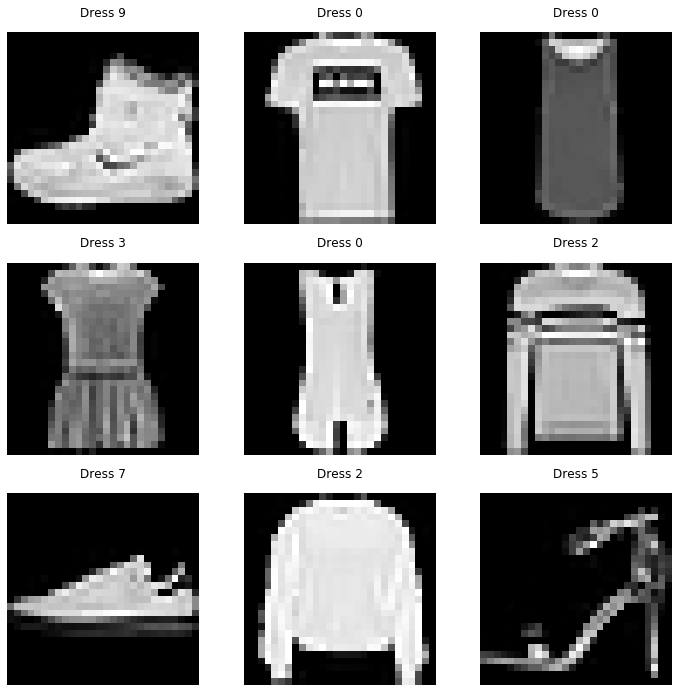

In [5]:
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
plt.gray()
for i, ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('Dress {}'.format(y_train[i]))

    fig.show()


In [6]:
X = x_train.reshape(len(x_train),-1)
Y = y_train

# normalize the data to 0 - 1

X = X.astype(float) / 255.

print(X.shape)
print(X[0].shape)

(60000, 784)
(784,)


In [7]:
from sklearn.cluster import MiniBatchKMeans

n_dress = len(np.unique(y_test))
print(n_dress)



10


In [21]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

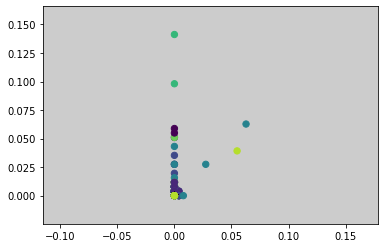

In [22]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10,random_state = 5)
kmeans.fit(X)

In [9]:
kmeans.labels_

array([0, 4, 8, ..., 4, 8, 8])

In [10]:
def infer_cluster_labels(kmeans, actual_labels):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """

    inferred_labels = {}

    for i in range(kmeans.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]

        #print(labels)
        #print('Cluster: {}, label: {}'.format(i, np.argmax(counts)))
        
    return inferred_labels  

def infer_data_labels(X_labels, cluster_labels):
    """
    Determines label for each array, depending on the cluster it has been assigned to.
    returns: predicted labels for each array
    """
    
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

In [11]:
# test the infer_cluster_labels() and infer_data_labels() functions
cluster_labels = infer_cluster_labels(kmeans, Y)
X_clusters = kmeans.predict(X)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print(predicted_labels[:20])
print(Y[:20])

[9 0 5 6 1 4 7 4 5 5 0 9 7 7 7 9 1 0 4 5]
[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4]


In [12]:
from sklearn import metrics
# function to calculate all the metrics 
def calculate_metrics(estimator, data, labels):

    # Calculate and print metrics
    print('Number of Clusters: {}'.format(estimator.n_clusters))
    print('Inertia: {}'.format(estimator.inertia_))
    print('Homogeneity: {}'.format(metrics.homogeneity_score(labels, estimator.labels_)))

In [13]:
clusters = [10, 16, 36, 64, 144, 256]
# test different numbers of clusters
for n_clusters in clusters:
    estimator = KMeans(n_clusters = n_clusters)
    estimator.fit(X)
    
    # print cluster metrics
    calculate_metrics(estimator, X, Y)
    
    # determine predicted labels
    cluster_labels = infer_cluster_labels(estimator, Y)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)
    
    # calculate and print accuracy
    print('Accuracy: {}\n'.format(metrics.accuracy_score(Y, predicted_Y)))

Number of Clusters: 10
Inertia: 1906652.392145173
Homogeneity: 0.5004064986773021
Accuracy: 0.5536666666666666

Number of Clusters: 16
Inertia: 1686909.8430356947
Homogeneity: 0.600415309862469
Accuracy: 0.6591166666666667

Number of Clusters: 36
Inertia: 1430457.9527015367
Homogeneity: 0.6499892691663535
Accuracy: 0.68785

Number of Clusters: 64
Inertia: 1297768.8410835585
Homogeneity: 0.6835242096337185
Accuracy: 0.7174

Number of Clusters: 144
Inertia: 1146478.1303990206
Homogeneity: 0.728378948984117
Accuracy: 0.7636333333333334

Number of Clusters: 256
Inertia: 1054724.486042605
Homogeneity: 0.7523066518873424
Accuracy: 0.7872333333333333



In [14]:
# test kmeans algorithm on testing dataset
# convert each image to 1 dimensional array
X_test = x_test.reshape(len(x_test),-1)



In [15]:
# normalize the data to 0 - 1
X_test = X_test.astype(float) / 255.

In [23]:
# initialize and fit KMeans algorithm on training data
kmeans = KMeans(n_clusters = 10)
kmeans.fit(X)
cluster_labels = infer_cluster_labels(kmeans, Y)

In [24]:
# predict labels for testing data
test_clusters = kmeans.predict(X_test)
predicted_labels = infer_data_labels(kmeans.predict(X_test), cluster_labels)

In [34]:
# calculate and print accuracy
print('Accuracy: {}\n'.format(metrics.accuracy_score(y_test, predicted_labels)))

Accuracy: 0.5807



IndexError: index 10 is out of bounds for axis 0 with size 10

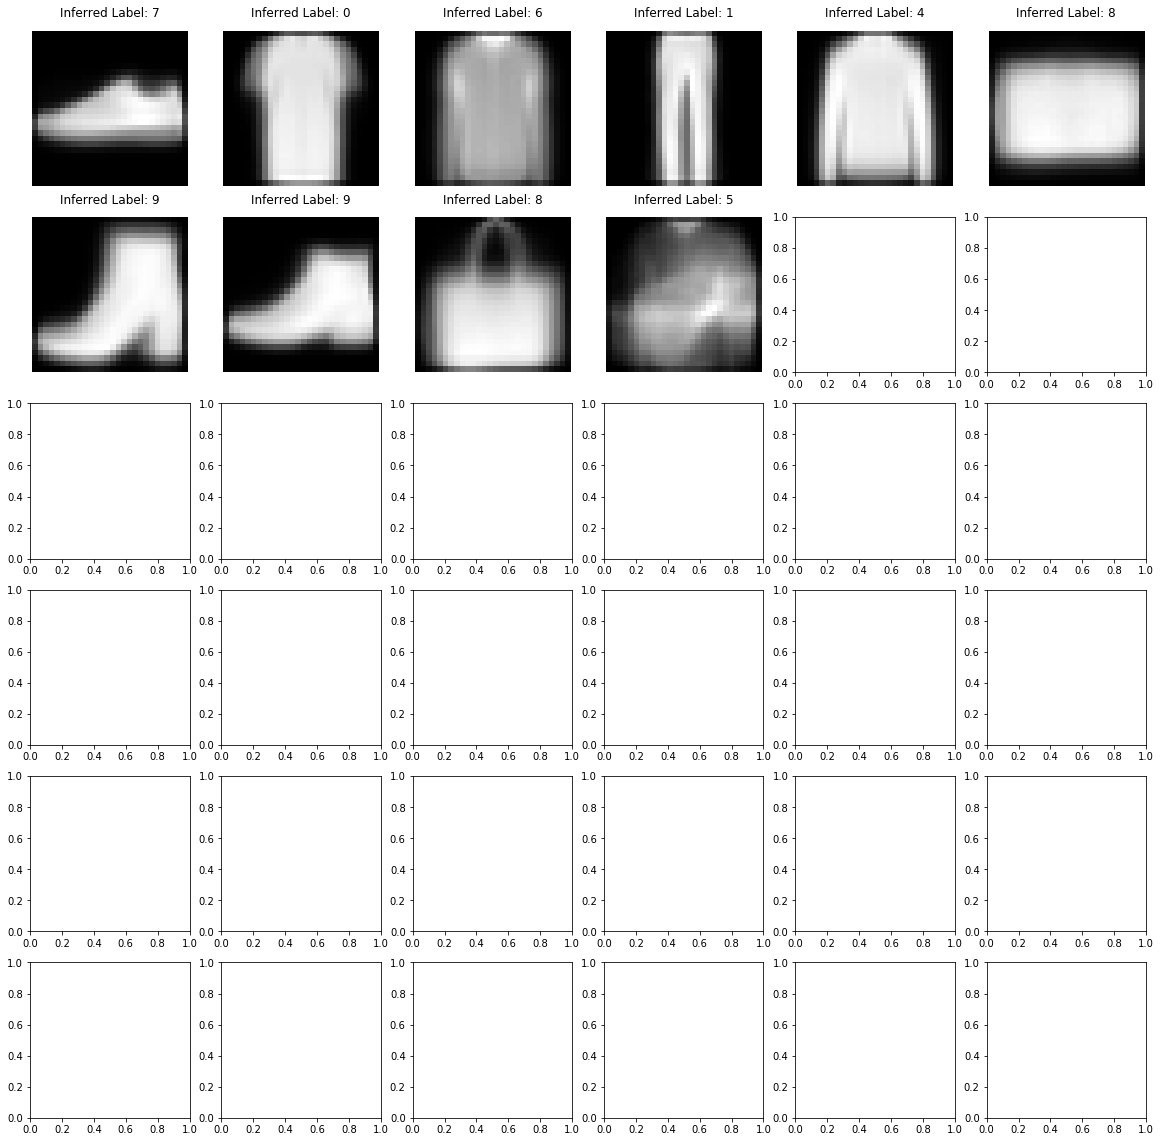

In [26]:
# Initialize and fit KMeans algorithm
kmeans = KMeans(n_clusters = 10)
kmeans.fit(X)

# record centroid values
centroids = kmeans.cluster_centers_

# reshape centroids into images
images = centroids.reshape(10, 28, 28)
images *= 255
images = images.astype(np.uint8)

# determine cluster labels
cluster_labels = infer_cluster_labels(kmeans, Y)

# create figure with subplots using matplotlib.pyplot
fig, axs = plt.subplots(6, 6, figsize = (20, 20))
plt.gray()

# loop through subplots and add centroid images
for i, ax in enumerate(axs.flat):
    
    # determine inferred label using cluster_labels dictionary
    for key, value in cluster_labels.items():
        if i in value:
            ax.set_title('Inferred Label: {}'.format(key))
    
    # add image to subplot
    ax.matshow(images[i])
    ax.axis('off')
    
# display the figure
fig.show()

# Part 2: Build an Auto-Encoder based K-Means clustering model to cluster the condensed representation of the unlabeled fashion MNIST dataset using Keras and Sklearns library.

In [27]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)


# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)


In [ ]:
autoencoder.summary

In [28]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [29]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))


In [30]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [31]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [33]:
autoencoder_train= autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 58us/step - loss: 0.2927 - acc: 0.5078 - val_loss: 0.2947 - val_acc: 0.5056
Epoch 2/50
60000/60000 [==============================] - 3s 52us/step - loss: 0.2925 - acc: 0.5078 - val_loss: 0.2945 - val_acc: 0.5056
Epoch 3/50
60000/60000 [==============================] - 3s 49us/step - loss: 0.2923 - acc: 0.5078 - val_loss: 0.2943 - val_acc: 0.5057
Epoch 4/50
60000/60000 [==============================] - 3s 53us/step - loss: 0.2920 - acc: 0.5078 - val_loss: 0.2940 - val_acc: 0.5056
Epoch 5/50
60000/60000 [==============================] - 3s 49us/step - loss: 0.2918 - acc: 0.5079 - val_loss: 0.2939 - val_acc: 0.5057
Epoch 6/50
60000/60000 [==============================] - 3s 57us/step - loss: 0.2916 - acc: 0.5079 - val_loss: 0.2936 - val_acc: 0.5057
Epoch 7/50
60000/60000 [==============================] - 3s 50us/step - loss: 0.2914 - acc: 0.5079 - val_loss: 0.2934 - val_acc

In [ ]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [ ]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [ ]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(50)
plt.figure()
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10,random_state = 5)
clustered_training_set = kmeans.fit_predict(encoded_imgs)
kmeans.fit(x_train)


In [ ]:
#Show the cluster centers 
kmeans.cluster_centers_


In [ ]:
clusters = [10]# test different numbers of clusters
for n_clusters in clusters:
    estimator = KMeans(n_clusters = n_clusters)
    estimator.fit(x_train)
    
    # print cluster metrics
    calculate_metrics(estimator, x_train, y_train)
    
    # determine predicted labels
    cluster_labels = infer_cluster_labels(estimator, y_train)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)
    
    # calculate and print accuracy
    print('Accuracy: {}\n'.format(metrics.accuracy_score(y_train, predicted_Y)))

In [ ]:
#Confusion matrix on Multi-layer neural network
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Observe and compare clustering result with actual label using confusion matrix
import seaborn as sns
cm = confusion_matrix(y_test, clustered_training_set)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix", fontsize=30)
plt.ylabel('True label', fontsize=25)
plt.xlabel('Clustering label', fontsize=25)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_mtx = confusion_matrix(y_test, clustered_training_set) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, 
            classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'])

In [ ]:
from sklearn.metrics import classification_report
#classification report precision recall f1-score support
classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
print(classification_report(y_test, clustered_training_set, target_names = classes))

In [ ]:
# Plot the actual pictures grouped by clustering
fig = plt.figure(figsize=(20,20))
for r in range(10):
    cluster = cm[r].argmax()
    for c, val in enumerate(x_test[clustered_training_set == cluster][0:10]):
        fig.add_subplot(10, 10, 10*r+c+1)
        plt.imshow(val.reshape((28,28)))
        plt.gray()
        plt.xticks([])
        plt.yticks([])
        plt.xlabel('cluster: '+str(cluster))
        plt.ylabel('digit: '+str(r))

# Part3 :Build an Auto-Encoder based Gaussian Mixture Model clustering model to cluster the condensed representation of the unlabeled fashion MNIST dataset using Keras and Sklearns library.

In [ ]:
from sklearn.mixture import GaussianMixture as GMM
#building a gmm model
gmm = GMM(n_components=100)
gmm_fit = gmm.fit(encoded_imgs)
gmm_perdict= gmm.fit_predict(encoded_imgs)

In [ ]:
#getting the accuracy of the model
print('Accuracy: {}\n'.format(metrics.accuracy_score(y_test, gmm_perdict)))

In [ ]:
#printing the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, gmm)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix", fontsize=30)
plt.ylabel('True label', fontsize=25)
plt.xlabel('Clustering label', fontsize=25)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
#classification report precision recall f1-score support
classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
print(classification_report(y_test, gmm, target_names = classes))